# Assignement - 2

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint

In [35]:
x,y=np.mgrid[-2:2:50j,-2:2:50j]

In [36]:
z=x+y*1j

In [37]:
def z_0(t):
    return 2-0.5*t + 0*1j  # velocity of doublet=(-0.5,0)

### Streamlines at t=2 sec

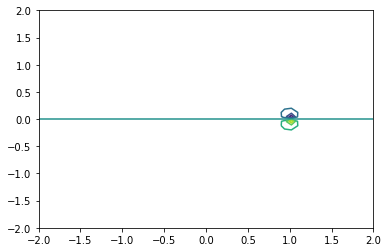

In [60]:
mu=1
t=2
Phi=mu/(2*np.pi*(z-z_0(t)))
plt.contour(x,y,np.imag(Phi));

In [39]:
def vel(r,t):
    c=r[0]+ r[1]*1j
    eps=0.01
    if np.abs(c-z_0(t))>eps:
        V=-1*mu/(2*np.pi*(c-z_0(t))*(c-z_0(t)))
        u=np.real(V)
        v=-1*np.imag(V)
    else:
        u=0
        v=0
    return u,v

### Path lines from t=0 sec to t=12 sec

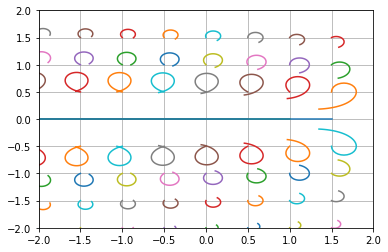

In [40]:
times=np.linspace(0,12,120)
for j in range(8):
    for i in range(8):
        ic=[-2+j/2,-2+i/2]
        sol=odeint(vel,ic,times)
        sx,sy=sol.T
        plt.plot(sx,sy)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()

### Streaklines from t=0 sec to t=12 sec

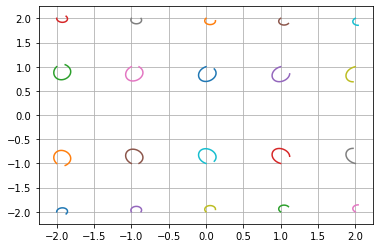

In [58]:
L=np.size(times)
X=np.zeros_like(times)

# print(time)
for i in [-2,-1,0,1,2]:
    for j in [-2,-1,1,2]:
        ic=[i,j]
        k=0 
        time=times             #origination point
        while np.size(time)>0:
            sol=odeint(vel,ic,time)
            sx1,sy1=sol.T
            X[k]=sx1[-1]
            Y[k]=sy1[-1]
            k=k+1
            time=time[1:]
        plt.plot(X,Y)  
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.grid()